In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 61.2MB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
     |████████████████████████████████| 3.8MB 31.8MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
2.0.0


In [0]:
# Additional Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train,y_test = y_train.flatten(),y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# number of classes (find number of unique elements using set)
K = len(set(y_train))
print('number of classes: ',K)

number of classes:  10


In [0]:
# build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [6]:
# Compile and fit
# note: make sure we are using a GPU enabled notebook for this
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.5845 - accuracy: 0.4193 - val_loss: 1.3010 - val_accuracy: 0.5246
Epoch 2/15
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.2912 - accuracy: 0.5341 - val_loss: 1.1436 - val_accuracy: 0.5920
Epoch 3/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1557 - accuracy: 0.5875 - val_loss: 1.0667 - val_accuracy: 0.6173
Epoch 4/15
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.0744 - accuracy: 0.6178 - val_loss: 0.9834 - val_accuracy: 0.6554
Epoch 5/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.9996 - accuracy: 0.6414 - val_loss: 0.9377 - val_accuracy: 0.6681
Epoch 6/15
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9442 - accuracy: 0.6634 - val_loss: 0.9186 - val_accuracy: 0.6796
Epoch 7/15
50000/50000 [==============================] 

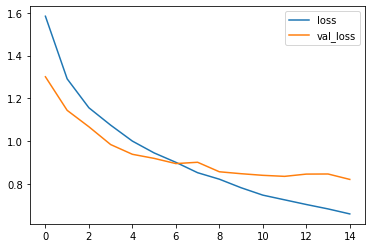

In [7]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

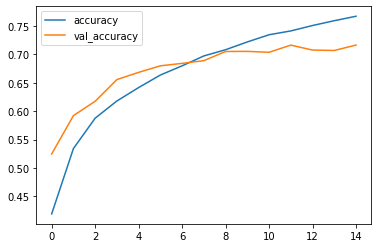

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confustion matrix, without normalization
[[680  20  48  12  29   3  13   8 134  53]
 [  7 849   3   7   5   0   7   7  18  97]
 [ 56   6 525  54 153  66  77  40  14   9]
 [ 13  12  42 474  88 198  84  57  15  17]
 [ 16   6  28  53 737  24  42  81  12   1]
 [  6   4  27 169  77 583  29  82  11  12]
 [  3   5  23  45  63  24 813   9   8   7]
 [  7   2  19  31  70  43   7 805   4  12]
 [ 34  38   8   8   6   5   5   6 865  25]
 [ 17  67   4  11   7   4   8  23  29 830]]


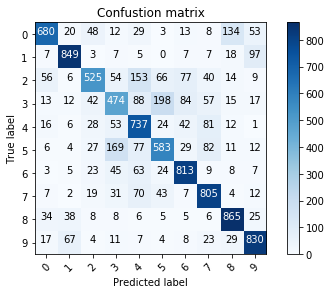

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confustion matrix',cmap=plt.cm.Blues):
  ###
  # This function prints and plots the confustion matrix
  # Normalization can be applied by setting 'normalize=True' 
  ###
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confustion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()  / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i, format(cm[i,j],fmt),
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

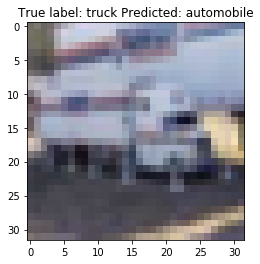

In [13]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3),cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]],labels[p_test[i]]));